# Introduction to Python

## Introduction to Jupyter Notebook

In [1]:
#!pip install -U -q install ipympl

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import time

from IPython.display import HTML
from IPython.display import Image
from IPython.display import Audio
from IPython.display import clear_output
from IPython.display import display
from IPython.lib.display import YouTubeVideo
from ipywidgets import widgets

#%matplotlib notebook
#%matplotlib widget
%matplotlib inline

plt.style.use('ggplot')

### Create markdown cells

Produce well formatted markdown cells with [Markdown sintax](https://guides.github.com/features/mastering-markdown/)

### Keyboard Shortcuts

As any power user knows, keyboard shortcuts will save you lots of time. Jupyter stores a list of keybord shortcuts under the menu at the top: Help > Keyboard Shortcuts, or by pressing H in command mode (more on that later). It's worth checking this each time you update Jupyter, as more shortcuts are added all the time.

Another way to access keyboard shortcuts, and a handy way to learn them is to use the command palette: Cmd + Shift + P (or Ctrl + Shift + P on Linux and Windows). This dialog box helps you run any command by name - useful if you don't know the keyboard shortcut for an action or if what you want to do does not have a keyboard shortcut. The functionality is similar to Spotlight search on a Mac, and once you start using it you'll wonder how you lived without it!

+ Some of my favorites:

    Esc will take you into command mode where you can navigate around your notebook with arrow keys.
    While in command mode:
        A to insert a new cell above the current cell, B to insert a new cell below.
        M to change the current cell to Markdown, Y to change it back to code
        D + D (press the key twice) to delete the current cell
    Enter will take you from command mode back into edit mode for the given cell.  
    Shift + Tab will show you the Docstring (documentation) for the the object you have just typed in a code cell   - you can keep pressing this short cut to cycle through a few modes of documentation.  
    Ctrl + Shift + - will split the current cell into two from where your cursor is.  
    Esc + F Find and replace on your code but not the outputs.  
    Esc + O Toggle cell output.  
    Select Multiple Cells:  
        Shift + J or Shift + Down selects the next sell in a downwards direction. You can also select sells in an upwards direction by using Shift + K or Shift + Up.  
        Once cells are selected, you can then delete / copy / cut / paste / run them as a batch. This is helpful when you need to move parts of a notebook.  
        You can also use Shift + M to merge multiple cells.  

### IPython Magic Commands

The %matplotlib inline you saw above was an example of a IPython Magic command. Being based on the IPython kernel, Jupyter has access to all the Magics from the IPython kernel, and they can make your life a lot easier!

In [3]:
# This will list all magic commands
%lsmagic

Available line magics:
%alias  %alias_magic  %autoawait  %autocall  %automagic  %autosave  %bookmark  %cat  %cd  %clear  %colors  %conda  %config  %connect_info  %cp  %debug  %dhist  %dirs  %doctest_mode  %ed  %edit  %env  %gui  %hist  %history  %killbgscripts  %ldir  %less  %lf  %lk  %ll  %load  %load_ext  %loadpy  %logoff  %logon  %logstart  %logstate  %logstop  %ls  %lsmagic  %lx  %macro  %magic  %man  %matplotlib  %mkdir  %more  %mv  %notebook  %page  %pastebin  %pdb  %pdef  %pdoc  %pfile  %pinfo  %pinfo2  %pip  %popd  %pprint  %precision  %prun  %psearch  %psource  %pushd  %pwd  %pycat  %pylab  %qtconsole  %quickref  %recall  %rehashx  %reload_ext  %rep  %rerun  %reset  %reset_selective  %rm  %rmdir  %run  %save  %sc  %set_env  %store  %sx  %system  %tb  %time  %timeit  %unalias  %unload_ext  %who  %who_ls  %whos  %xdel  %xmode

Available cell magics:
%%!  %%HTML  %%SVG  %%bash  %%capture  %%debug  %%file  %%html  %%javascript  %%js  %%latex  %%markdown  %%perl  %%prun  %%pypy  %%

### IPython Magic - %env: Set Environment Variables

You can manage environment variables of your notebook without restarting the jupyter server process. Some libraries (like theano) use environment variables to control behavior, %env is the most convenient way.

In [4]:
# Running %env without any arguments
# lists all environment variables

# The line below sets the environment
# variable OMP_NUM_THREADS
%env OMP_NUM_THREADS=4

env: OMP_NUM_THREADS=4


### IPython Magic - %run: Execute python code

%run can execute python code from .py files - this is well-documented behavior. Lesser known is the fact that it can also execute other jupyter notebooks, which can quite useful.

Note that using %run is not the same as importing a python module.

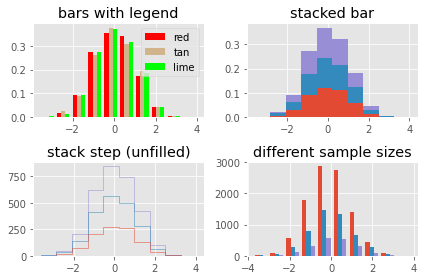

<Figure size 432x288 with 0 Axes>

In [5]:
# this will execute and show the output from
# all code cells of the specified notebook
%run ./histogram_multihist.py

### IPython Magic - %load: Insert the code from an external script

This will replace the contents of the cell with an external script. You can either use a file on your computer as a source, or alternatively a URL.

In [6]:
# %load ./hello_world.py
# After Running
# %load ./hello_world.py
if __name__ == "__main__":
	print("Hello World!")


Hello World!


In [7]:
# After Running
# %load ./hello_world.py
if __name__ == "__main__":
    print("Hello World!")

Hello World!


### IPython Magic - %who: List all variables of global scope.

The %who command without any arguments will list all variables that existing in the global scope. Passing a parameter like str will list only variables of that type.

In [8]:
%who

Audio	 HTML	 Image	 YouTubeVideo	 ax0	 ax1	 ax2	 ax3	 clear_output	 
colors	 display	 fig	 n_bins	 np	 pd	 plt	 time	 widgets	 
x	 x_multi	 


### IPython Magic - Timing

There are two IPython Magic commands that are useful for timing - %%time and %timeit. These are especially handy when you have some slow code and you're trying to indentify where the issue is.  

%%time will give you information about a single run of the code in your cell.  

%%timeit uses the Python timeit module which runs a statement 100,000 times (by default) and then provides the mean of the fastest three times.  

In [9]:
%%time

for _ in range(1000):
    time.sleep(0.01)# sleep for 0.01 seconds

CPU times: user 15.3 ms, sys: 20.1 ms, total: 35.4 ms
Wall time: 10.1 s


In [10]:
%timeit np.random.normal(size=100)

4.44 µs ± 173 ns per loop (mean ± std. dev. of 7 runs, 100,000 loops each)


### Profiling: %prun, %mprun

In [11]:
def funcao_lenta():
    for i in range(10):
        x = np.random.randint(10)
        print(x)
        time.sleep(x)
    
%prun funcao_lenta()

0
9
9
4
8
7
0
6
2
5
 

         238 function calls in 50.048 seconds

   Ordered by: internal time

   ncalls  tottime  percall  cumtime  percall filename:lineno(function)
       10   50.046    5.005   50.046    5.005 {built-in method time.sleep}
       10    0.001    0.000    0.001    0.000 {method 'randint' of 'numpy.random.mtrand.RandomState' objects}
        8    0.000    0.000    0.000    0.000 socket.py:438(send)
       20    0.000    0.000    0.001    0.000 iostream.py:525(write)
        1    0.000    0.000   50.048   50.048 591463035.py:1(funcao_lenta)
       10    0.000    0.000    0.001    0.000 {built-in method builtins.print}
        8    0.000    0.000    0.001    0.000 iostream.py:209(schedule)
       20    0.000    0.000    0.000    0.000 iostream.py:436(_is_master_process)
       20    0.000    0.000    0.000    0.000 {built-in method posix.getpid}
       20    0.000    0.000    0.001    0.000 iostream.py:455(_schedule_flush)
        8    0.000    0.000    0.000    0.000 threading.py:1071(is_

In [12]:
%load_ext memory_profiler

ModuleNotFoundError: No module named 'memory_profiler'

In [ ]:
%mprun -f funcao_lenta()

### IPython Magic - Debugging with %pdb

Jupyter has own interface for The Python Debugger (pdb). This makes it possible to go inside the function and investigate what happens there.

In [ ]:
%pdb

def pick_and_take():
    picked = np.random.randint(0, 1000)
    raise NotImplementedError()
pick_and_take()

You can view a list of accepted commands for pdb [here](https://docs.python.org/3.5/library/pdb.html#debugger-commands).

+ IPython Magic - High-resolution plot outputs for Retina notebooks

One line of IPython magic will give you double resolution plot output for Retina screens, such as the more recent Macbooks. Note: the example below won't render on non-retina screens

In [ ]:
x = range(1000)
y = [i ** 2 for i in x]
plt.plot(x,y)
plt.show();

In [ ]:
%config InlineBackend.figure_format = 'retina'
plt.plot(x,y)
plt.show();

### Suppress the output of a final function.

Sometimes it's handy to suppress the output of the function on a final line, for instance when plotting. To do this, you just add a semicolon at the end.

In [ ]:
x = np.linspace(0, 1, 1000)**1.5
# Here you get the output of the function
plt.hist(x)

In [ ]:
# By adding a semicolon at the end, the output is suppressed.
plt.hist(x);

### Using R and Python in the Notebook:

As described in the [rmagics documentation](https://ipython.org/ipython-doc/2/config/extensions/rmagic.html), you can use %Rpush and %Rpull to move values back and forth between R and Python: 

### Executing Shell Commands

It's easy to execute a shell command from inside your notebook. You can use this to check what datasets are in available in your working folder:

In [ ]:
!ls -l

In [ ]:
!pip3 list | grep pandas

### Using $\LaTeX$ no markdown for formulas:

When you write LaTeX in a Markdown cell, it will be rendered as a formula using MathJax.

This:

\\( P(A \mid B) = \frac{P(B \mid A) \, P(A)}{P(B)} \\)

### Run code from a different kernel in a notebook

If you want to, you can combine code from multiple kernels into one notebook.

Just use IPython Magics with the name of your kernel at the start of each cell that you want to use that Kernel for:

    %%bash
    %%HTML
    %%python2
    %%python3
    %%ruby
    %%perl

In [ ]:
%%bash
for i in {1..5}
do
   echo "i is $i"
done

### Jupyter-contrib extensions

[Jupyter-contrib](https://github.com/ipython-contrib/jupyter_contrib_nbextensions) extensions is a family of extensions which give Jupyter a lot more functionality

### Create a presentation from a Jupyter notebook.

Damian Avila's RISE allows you to create a powerpoint style presentation from an existing notebook.  
You can install RISE using conda:  

  $ conda install -c damianavila82 rise  
  
Or alternatively pip:  

  $ pip install RISE

### Embbeding Images, Audio and Videos in the Notebook

In [ ]:
Image(url="https://www.dataquest.io/blog/content/images/interface-screenshot.png")

In [ ]:
display(Image('https://i.ytimg.com/vi/j22DmsZEv30/maxresdefault.jpg', width=900, unconfined=True))

In [ ]:
HTML('<iframe width="560" height="315" src="https://www.youtube.com/embed/Rc4JQWowG5I" frameborder="0" allow="autoplay; encrypted-media" allowfullscreen></iframe>')

In [ ]:
YouTubeVideo('Rc4JQWowG5I')

In [ ]:
Audio("../datasets/Miscellaneous/Como_nossos_pais.m4a")

### Plotting in notebooks

There are many options for generating plots in your notebooks.

[matplotlib](http://matplotlib.org/) (the de-facto standard), activated with %matplotlib inline.
    %matplotlib notebook provides interactivity but can be a little slow, since rendering is done server-side.
    
[Seaborn](http://seaborn.pydata.org/) is built over Matplotlib and makes building more attractive plots easier. Just by importing Seaborn, your matplotlib plots are made 'prettier' without any code modification.

[mpld3](https://github.com/mpld3/mpld3) provides alternative renderer (using d3) for matplotlib code. Quite nice, though incomplete.

[bokeh](http://bokeh.pydata.org/en/latest/) is a better option for building interactive plots.

[plot.ly](https://plot.ly/) can generate nice plots - this used to be a paid service only but was recently open sourced.

[Altair](https://github.com/altair-viz/altair) is a relatively new declarative visualization library for Python. It's easy to use and makes great looking plots, however the ability to customize those plots is not nearly as powerful as in Matplotlib.


### Pretty Display of Variables

By finishing a Jupyter cell with the name of a variable or unassigned output of a statement, Jupyter will display that variable without the need for a print statement. This is especially useful when dealing with Pandas DataFrames, as the output is neatly formatted into a table.  

What is known less, is that you can alter a modify the ast_note_interactivity kernel option to make jupyter do this for any variable or statement on it's own line, so you can see the value of multiple statements at once.  

In [ ]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [ ]:
from pydataset import data
quakes = data('quakes')
quakes.head()
quakes.tail()

### Cleaning cell output

In [ ]:
for i in range(100):
    print(i)
    time.sleep(0.1)
    clear_output(wait=True)

### Widgets

In [ ]:
text = widgets.Text()
display(text)

def handle_submit(sender):
    print()
    
text.on_submit(handle_submit)

In [ ]:
button = widgets.Button(description = "Click Me")
display(button)

def on_button_clicked(b):
    print("Button Clicked")

button.on_click(on_button_clicked)

In [ ]:
def f(x):
    print(x)
    
widgets.interact(f, x=10)

In [ ]:
widgets.interact(f, x=True)

In [ ]:
outputText = widgets.Text()
outputText

In [ ]:
inputText = widgets.Text()

def uppercase(sender):
    outputText.value = inputText.value.upper()
    
inputText.on_submit(uppercase)
inputText

In [ ]:
t = np.arange(0.0, 1.0, 0.01)

def pltsin(f):
    plt.plot(t, np.sin(2*np.pi*t*f))
    plt.show()
    
widgets.interact(pltsin, f=(1,10,0.1))

### Easy links to documentation

Inside the Help menu you'll find handy links to the online documentation for common libraries including NumPy, Pandas, SciPy and Matplotlib.

Don't forget also that by prepending a library, method or variable with ?, you can access the Docstring for quick reference on syntax.

In [ ]:
?str.replace()

### Sharing notebooks

The easiest way to share your notebook is simply using the notebook file (.ipynb), but for those who don't use Jupyter, you have a few options:

   + Convert notebooks to html file using the File > Download as > HTML Menu option.
   + Share your notebook file with [gists](https://gist.github.com/) or on github, both of which render the notebooks. See [this example](https://github.com/dataquestio/solutions/blob/master/Mission202Solution.ipynb).
   + If you upload your notebook to a github repository, you can use the handy [mybinder](http://mybinder.org/) service to allow someone half an hour of interactive Jupyter access to your repository.
   + Setup your own system with [jupyterhub](https://github.com/jupyterhub/jupyterhub), this is very handy when you organize mini-course or workshop and don't have time to care about students machines.
   + Store your notebook e.g. in dropbox and put the link to [nbviewer](http://nbviewer.jupyter.org/). nbviewer will render the notebook from whichever source you host it.
   + Use the File > Download as > PDF menu to save your notebook as a PDF. If you're going this route, I highly recommend reading Julius Schulz's excellent article [Making publication ready Python notebooks](http://blog.juliusschulz.de/blog/ultimate-ipython-notebook).
   + [Create a blog using Pelican from your Jupyter notebooks](https://www.dataquest.io/blog/how-to-setup-a-data-science-blog/).


Useful links

+ [IPython built-in magics](https://ipython.org/ipython-doc/3/interactive/magics.html)
+ [Nice interactive presentation about jupyter by Ben Zaitlen](http://quasiben.github.io/dfwmeetup_2014/#/)
+ Advanced notebooks [part 1: magics](https://blog.dominodatalab.com/lesser-known-ways-of-using-notebooks/) and [part 2: widgets](https://blog.dominodatalab.com/interactive-dashboards-in-jupyter/)
+ [Profiling in python with jupyter](http://pynash.org/2013/03/06/timing-and-profiling/)
+ [4 ways to extend notebooks](http://mindtrove.info/4-ways-to-extend-jupyter-notebook/)
+ [IPython notebook tricks](https://www.quora.com/What-are-your-favorite-tricks-for-IPython-Notebook)
+ [Jupyter vs Zeppelin for big data](https://www.linkedin.com/pulse/comprehensive-comparison-jupyter-vs-zeppelin-hoc-q-phan-mba-)